# Predicting House Prices in Seattle

## Import turi create

In [36]:
import turicreate as tc

In [37]:
import matplotlib.pyplot as plt

## Load the sales data to an SFrame

In [38]:
sales = tc.SFrame('/Users/iomargaris/Desktop/Machine Learning Specialization -  Coursera/Week 2/home_data.gl/')

In [39]:
sales.column_names #Display a preview of the columns

<bound method SFrame.column_names of Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900 |    3     |     1     |     1180    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000 |    2     |     1     |     770     |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000 |    4     |     3     |     1960    |
| 19

## Visualizing the data

In [40]:
# Scatter plot using turicreate
tc.visualization.scatter(sales['sqft_living'],sales['price'],xlabel='Sqrft_Living', ylabel='Price')

Trying the same with matplotlib

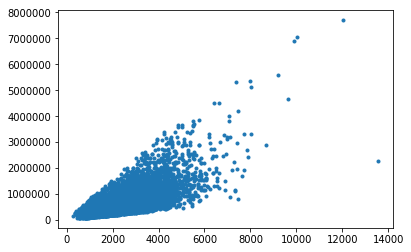

In [41]:
%matplotlib inline
plt.scatter(sales['sqft_living'],sales['price'], marker='.')

# Create a simple regression model of sqft_living and price

- Split sales SFrame into training and test sets (.8 means 80%, so it will split it 80/20)
- Seed=0 to always split the SFrame the same way

In [42]:
training_set,test_set = sales.random_split(.8,seed=0)

## Build the regression model

In [43]:
# Linear Regression
# 'validation_set = None' means to not keep a small set of the training data
# from the 'training_set' for validation purposes
sqft_model = tc.linear_regression.create(training_set, target='price', features=['sqft_living'], validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 1.015991     | 7700000.000000     | 653896.065947                   |

| 1         | 2        | 1.027909     | 4349521.926170     | 262943.613754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the simple regression model

In [44]:
# Computing the average price
print test_set['price'].mean()

543054.042563


In [45]:
# 'evaluate' shows us the ablilty of our model to make predictions.
# Display the maximum error and RMSE (Root Mean Square Error)
print sqft_model.evaluate(training_set)

{'max_error': 4349521.926170059, 'rmse': 262943.6137536493}


## Lets show what our predictions look like

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

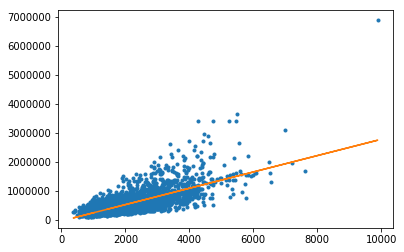

In [47]:
plt.plot(test_set['sqft_living'], test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

## Extracting the coefficients from the model

In [48]:
print sqft_model.coefficients

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -47114.0206702 | 4923.34437752 |
| sqft_living |  None | 281.957850166  | 2.16405465323 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]



# Exploring other features in the data

In [49]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [50]:
sales[my_features].show()

Materializing SFrame

In [51]:
tc.visualization.box_plot(sales['zipcode'], sales['price'], xlabel='Zipcode', ylabel='Price')

# Building a regression model with more features

In [52]:
my_features_model = tc.linear_regression.create(training_set, target='price', features=my_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 0.012136     | 7700000.000000     | 653896.065947                   |

| 1         | 2        | 0.030706     | 3763208.270524     | 181908.848367                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [53]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [54]:
print sqft_model.evaluate(test_set)
print my_features_model.evaluate(test_set)

{'max_error': 4143550.8825285933, 'rmse': 255191.02870527367}
{'max_error': 3486584.509381927, 'rmse': 179542.43331269105}


# Apply these learned models to predict prices of 3 houses

In [55]:
house1 = sales[sales['id']=='5309101200']

In [56]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [57]:
print house1['price']

[620000, ... ]


In [58]:
print sqft_model.predict(house1)

[629584.8197281545]


In [59]:
print my_features_model.predict(house1)

[721918.9333272815]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

# Prediction for a second, fancier house

In [60]:
house2 = sales[sales['id']=='1925069082']

In [61]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [62]:
print sqft_model.predict(house2)

[1261170.4040999683]


In [63]:
print my_features_model.predict(house2)

[1446472.4690774991]


## The last, even fancier house (Bill Gates)

In [64]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [65]:
bill_gates_sf = tc.SFrame(bill_gates)

In [66]:
print sqft_model.predict(bill_gates_sf)

[14050778.487629198]


In [67]:
print my_features_model.predict(bill_gates_sf)

[13749825.525717655]


The model predicts a price of over $13M for this house! But we expect the house to cost much more. (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

# Programming Assignments

## Assignment 1: Selection and summary statistics:
In the notebook we covered in the module, we discovered which neighborhood (zip code) of Seattle had the highest average house sale price. Now, take the sales data, select only the houses with this zip code, and compute the average price. Save this result to answer the quiz at the end.

In [68]:
zip_code_98039 = sales[sales['zipcode']=='98039']

In [69]:
zip_code_98039

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 3625049014 | 2014-08-29 00:00:00+00:00 | 2950000 |    4     |    3.5    |     4860    |
| 2540700110 | 2015-02-12 00:00:00+00:00 | 1905000 |    4     |    3.5    |     4210    |
| 3262300940 | 2014-11-07 00:00:00+00:00 |  875000 |    3     |     1     |     1220    |
| 3262300940 | 2015-02-10 00:00:00+00:00 |  940000 |    3     |     1     |     1220    |
| 6447300265 | 2014-10-14 00:00:00+00:00 | 4000000 |    4     |    5.5    |     7080    |
| 2470100110 | 2014-08-04 00:00:00+00:00 | 5570000 |    5     |    5.75   |     9200    |
| 2210500019 | 2015-03-24 00:00:00+00:00 |  937500 |    3     |     1     |     1320    |
| 6447300345 | 2015-04-06 00:00:00+00:00 | 1160000 |    4     |     3     |     2680    |
| 6447300225 | 2014-11-06 00:00:00+00:00 | 1880000 |    3     |    2.75   |     2620    |
| 2525049148 | 2014-10-07 00:00:00+00:00 | 3418800 |    5     |     5     |     5450    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  23885   |   2    |     0      |  0   |     3     |   12  |    4860    |       0       |
|  18564   |   2    |     0      |  0   |     3     |   11  |    4210    |       0       |
|   8119   |   1    |     0      |  0   |     4     |   7   |    1220    |       0       |
|   8119   |   1    |     0      |  0   |     4     |   7   |    1220    |       0       |
|  16573   |   2    |     0      |  0   |     3     |   12  |    5760    |      1320     |
|  35069   |   2    |     0      |  0   |     3     |   13  |    6200    |      3000     |
|   8500   |   1    |     0      |  0   |     4     |   7   |    1320    |       0       |
|  15438   |   2    |     0      |  2   |     3     |   8   |    2680    |       0       |
|  17919   |   1    |     0      |  1   |     4     |   9   |    2620    |       0       |
|  20412   |   2    |     0      |  0   |     3     |   11  |    5450    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1996   |      0       |  98039  | 47.61717049 | -122.23040939 |     3580.0    | ... |
|   2001   |      0       |  98039  | 47.62060082 |  -122.2245047 |     3520.0    | ... |
|   1955   |      0       |  98039  | 47.63281908 | -122.23554392 |     1910.0    | ... |
|   1955   |      0       |  98039  | 47.63281908 | -122.23554392 |     1910.0    | ... |
|   2008   |      0       |  98039  | 47.61512031 | -122.22420058 |     3140.0    | ... |
|   2001   |      0       |  98039  | 47.62888314 | -122.23346379 |     3560.0    | ... |
|   1954   |      0       |  98039  | 47.61872888 | -122.22643371 |     2790.0    | ... |
|   1902   |     1956     |  98039  | 47.61089438 | -122.22582388 |     4480.0    | ... |
|   1949   |      0       |  98039  | 47.61435052 | -122.22772057 |     3400.0    | ... |
|   2014   |      0       |  98039  | 47.62087993 | -12

Getting the average price of the houses with zipcode equal to 98039

In [70]:
zip_code_98039['price'].mean()

2160606.5999999996

## Assignment 2: Filtering data
One of the key features we used in our model was the number of square feet of living space (‘sqft_living’) in the house. For this part, we are going to use the idea of filtering (selecting) data. In particular, we are going to use logical filters to select rows of an SFrame. You can find more info in the Logical Filter section of this documentation. Using such filters, first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.What fraction of the all houses have ‘sqft_living’ in this range? Save this result to answer the quiz at the end.

-  ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.

In [71]:
houses_filtered_2000_4000 = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)]

In [72]:
houses_filtered_2000_4000.num_rows

<bound method SFrame.num_rows of Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 1736800520 | 2015-04-03 00:00:00+00:00 |  662500 |    3     |    2.5    |     3560    |
| 9297300055 | 2015-01-24 00:00:00+00:00 |  650000 |    4     |     3     |     2950    |
| 2524049179 | 2014-08-26 00:00:00+00:00 | 2000000 |    3     |    2.75   |     3050    |
| 7137

In [73]:
houses_filtered_2000_4000.materialize()

In [74]:
houses_filtered_2000_4000.num_rows

<bound method SFrame.num_rows of Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 9118

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 1736800520 | 2015-04-03 00:00:00+00:00 |  662500 |    3     |    2.5    |     3560    |
| 9297300055 | 2015-01-24 00:00:00+00:00 |  650000 |    4     |     3     |     2950    |
| 2524049179 | 2014-08-26 00:00:00+00:00 | 2000000 |    3     |    2.75   |     3050    |
| 7137970

Filtered houses from 2000 up to 4000 contain: 9118 rows x 21 columns

In [75]:
sales.materialize()

In [76]:
sales.num_rows

<bound method SFrame.num_rows of Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900 |    3     |     1     |     1180    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000 |    2     |     1     |     770     |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000 |    4     |     3     |     1960    |
| 195440

Total sales SF contains: 21613 rows x 21 columns

In [77]:
#21613 100
#9118 x

x = (9118*100)/.21613
x

4218757.229445241

So, the fraction of the all houses that have ‘sqft_living’ in this range is 4218757.229445241%

## Assignment 3: Building a regression model with several more features
What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features? Save this result to answer the quiz at the end.

In [78]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

### First lets build a linear regression model based on our 'advanced_features'

In [79]:
advanced_features_model = tc.linear_regression.create(training_set, target='price', features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 0         | 1        | 0.007964     | 7700000.000000     | 653896.065947                   |

| 1         | 2        | 0.028120     | 3469012.450664     | 154580.940735                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

## Comapring evaluations of all models:

In [80]:
sqft_model.evaluate(test_set)

{'max_error': 4143550.8825285933, 'rmse': 255191.02870527367}

In [81]:
my_features_model.evaluate(test_set)

{'max_error': 3486584.509381927, 'rmse': 179542.43331269105}

In [82]:
advanced_features_model.evaluate(test_set)

{'max_error': 3556849.413848382, 'rmse': 156831.11680192588}

In [83]:
rmse_advanced_features = 156831.11680192588
rmse_my_features = 179542.43331269105
rmse_diff = rmse_my_features - rmse_advanced_features
rmse_diff

22711.316510765173